
PHASE 1: PROJECT PLANNING
Objective: Identify factors responsible for customer churn

PHASE 2: DATA COLLECTION & PREPARATION
Dataset Loaded
Rows, Columns: (500, 9)
Data Cleaning Completed

PHASE 3: EXPLORATORY DATA ANALYSIS


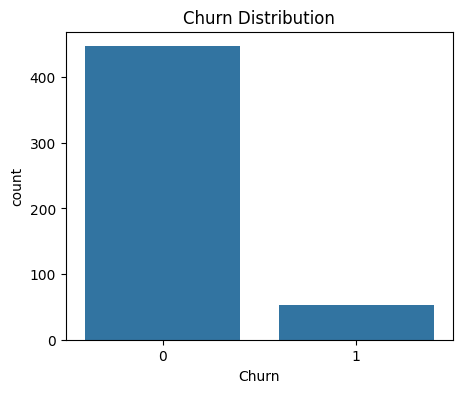

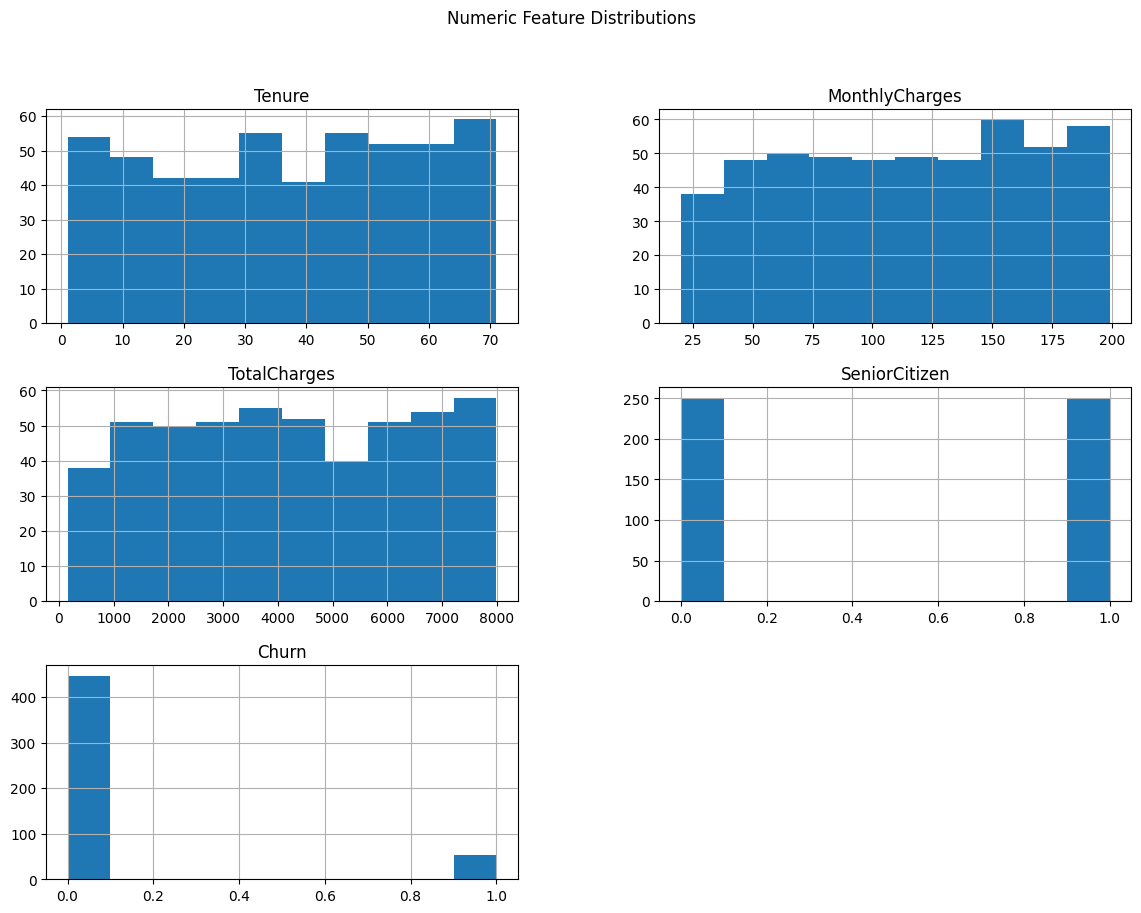

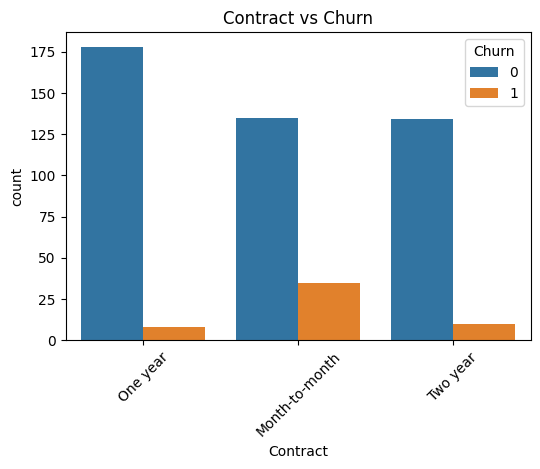

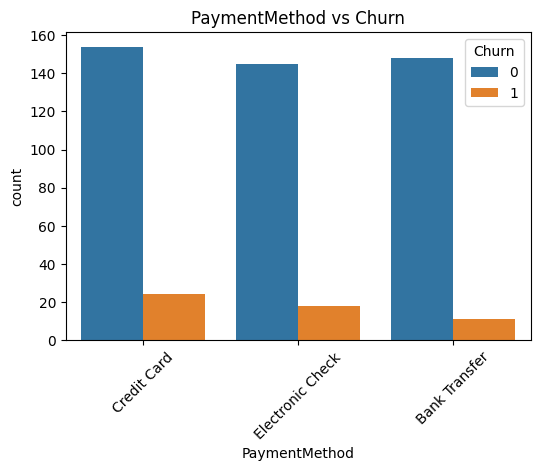

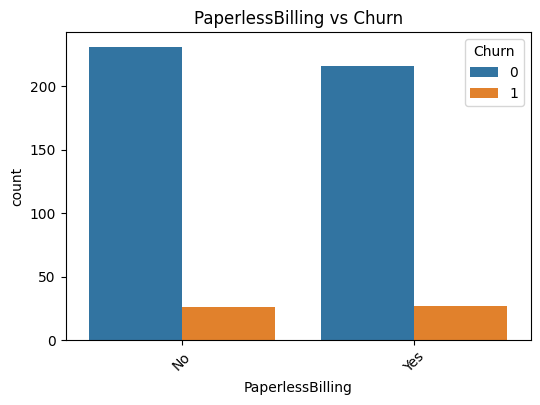

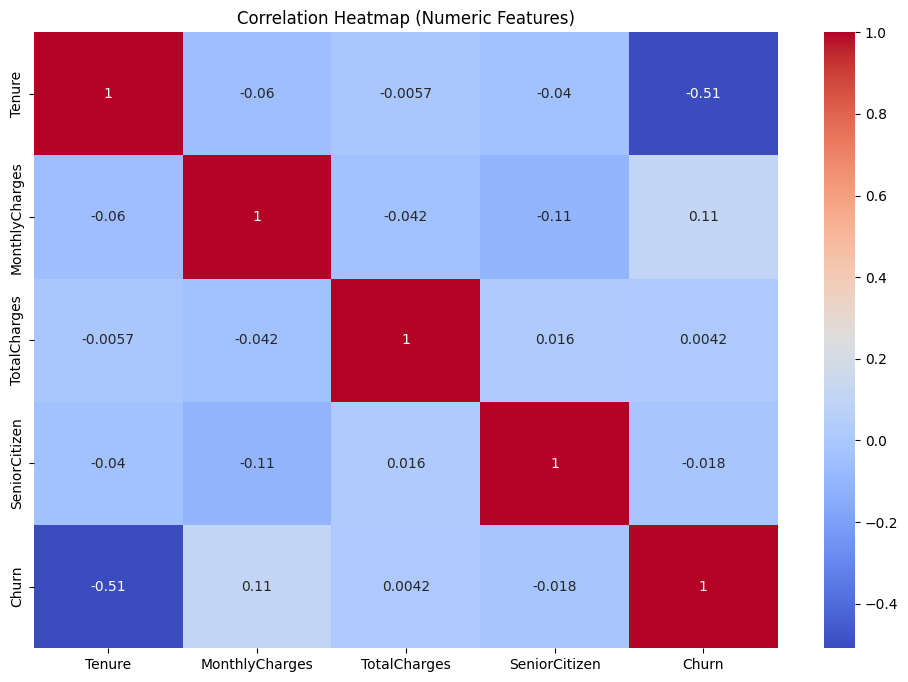

EDA Completed

PHASE 4: ADVANCED ANALYSIS
T-Test p-value (Monthly Charges vs Churn): 0.0163

Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       134
           1       0.85      0.69      0.76        16

    accuracy                           0.95       150
   macro avg       0.90      0.84      0.87       150
weighted avg       0.95      0.95      0.95       150


Top 10 Churn Influencing Features:
PaymentMethod_Electronic Check    0.794491
PaymentMethod_Credit Card         0.273116
PaperlessBilling_Yes              0.108807
MonthlyCharges                    0.012213
TotalCharges                      0.000064
Tenure                           -0.279176
SeniorCitizen                    -0.307792
Contract_Two year                -1.498241
Contract_One year                -2.082070
dtype: float64

Advanced Analysis Completed

PHASE 5: INSIGHTS & RECOMMENDATIONS

KEY INSIGHTS:
1. Short-term contract customers chur

In [11]:
# ======================================================
# CUSTOMER CHURN ANALYSIS PROJECT (ERROR-LESS VERSION)
# ======================================================

# ---------------------------
# PHASE 1: PROJECT PLANNING
# ---------------------------
print("\nPHASE 1: PROJECT PLANNING")
print("Objective: Identify factors responsible for customer churn\n")

# ---------------------------
# PHASE 2: DATA COLLECTION & PREPARATION
# ---------------------------
print("PHASE 2: DATA COLLECTION & PREPARATION")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("/content/customer_churn.csv")

print("Dataset Loaded")
print("Rows, Columns:", df.shape)

# Drop ID-like columns automatically
for col in df.columns:
    if df[col].dtype == 'object' and df[col].nunique() == len(df):
        df.drop(col, axis=1, inplace=True)

# Handle missing values
df.fillna(df.median(numeric_only=True), inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)

# Convert Churn column safely
if 'Churn' in df.columns:
    if df['Churn'].dtype == 'object':
        df['Churn'] = df['Churn'].str.lower().map({'yes':1, 'no':0})

# Remove duplicates
df.drop_duplicates(inplace=True)

print("Data Cleaning Completed\n")

# ---------------------------
# PHASE 3: EXPLORATORY DATA ANALYSIS
# ---------------------------
print("PHASE 3: EXPLORATORY DATA ANALYSIS")

# Churn distribution
plt.figure(figsize=(5,4))
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()

# Separate numeric and categorical columns
numeric_cols = df.select_dtypes(include=['int64','float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Numeric feature distributions
df[numeric_cols].hist(figsize=(14,10))
plt.suptitle("Numeric Feature Distributions")
plt.show()

# Categorical vs Churn
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue='Churn', data=df)
    plt.xticks(rotation=45)
    plt.title(f"{col} vs Churn")
    plt.show()

# Correlation heatmap (numeric only)
plt.figure(figsize=(12,8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

print("EDA Completed\n")

# ---------------------------
# PHASE 4: ADVANCED ANALYSIS
# ---------------------------
print("PHASE 4: ADVANCED ANALYSIS")

from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Hypothesis Testing (Monthly Charges)
if 'MonthlyCharges' in df.columns:
    churned = df[df['Churn']==1]['MonthlyCharges']
    not_churned = df[df['Churn']==0]['MonthlyCharges']

    if len(churned) > 0 and len(not_churned) > 0:
        t_stat, p_val = ttest_ind(churned, not_churned)
        print("T-Test p-value (Monthly Charges vs Churn):", round(p_val,4))

# Prepare data for ML
X = df.drop('Churn', axis=1)
X = pd.get_dummies(X, drop_first=True)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Logistic Regression model
model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# Feature importance
feature_importance = pd.Series(
    model.coef_[0], index=X.columns
).sort_values(ascending=False)

print("\nTop 10 Churn Influencing Features:")
print(feature_importance.head(10))

print("\nAdvanced Analysis Completed\n")

# ---------------------------
# PHASE 5: INSIGHTS & RECOMMENDATIONS
# ---------------------------
print("PHASE 5: INSIGHTS & RECOMMENDATIONS")

print("""
KEY INSIGHTS:
1. Short-term contract customers churn more frequently
2. Higher monthly charges increase churn risk
3. New customers are more likely to leave
4. Payment and service types impact churn

BUSINESS RECOMMENDATIONS:
✔ Promote long-term contracts
✔ Offer discounts to high-value customers
✔ Improve early-stage customer engagement
✔ Provide flexible payment options
""")

print("PROJECT EXECUTED SUCCESSFULLY ✅")
